In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [10]:
job_df = pd.read_csv("glassdoor_reviews.csv")

In [12]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541223 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

In [14]:
job_df.head(2)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...


## Are there any trends in employee satisfaction over time (e.g., by year or quarter)?

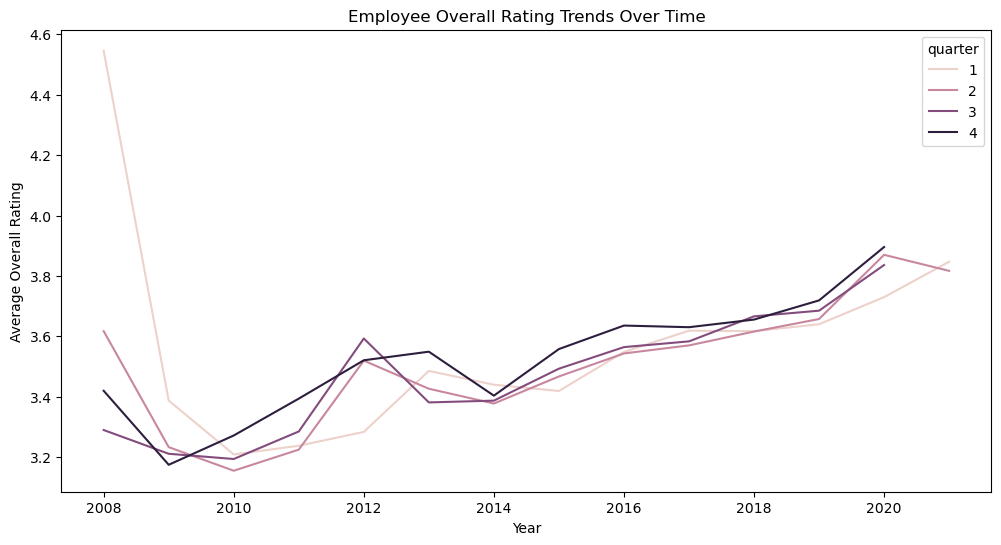

In [17]:
# Convert date_review to datetime
job_df['date_review'] = pd.to_datetime(job_df['date_review'])

# Extract year and quarter
job_df['year'] = job_df['date_review'].dt.year
job_df['quarter'] = job_df['date_review'].dt.quarter

# Group by year and quarter to find average overall rating
trends_over_time = job_df.groupby(['year', 'quarter'])['overall_rating'].mean().reset_index()

# Plot trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='overall_rating', hue='quarter', data=trends_over_time)
plt.title('Employee Overall Rating Trends Over Time')
plt.ylabel('Average Overall Rating')
plt.xlabel('Year')
plt.show()

## Top Rated (5) Companies Who Are Present in All Time

Top 5 Companies by Median Overall Rating (Present in All Years):
                       firm  overall_rating
14         Bain-and-Company        4.559757
43                   Google        4.392998
57                 LinkedIn        4.378267
20  Boston-Consulting-Group        4.301789
63     McKinsey-and-Company        4.296514


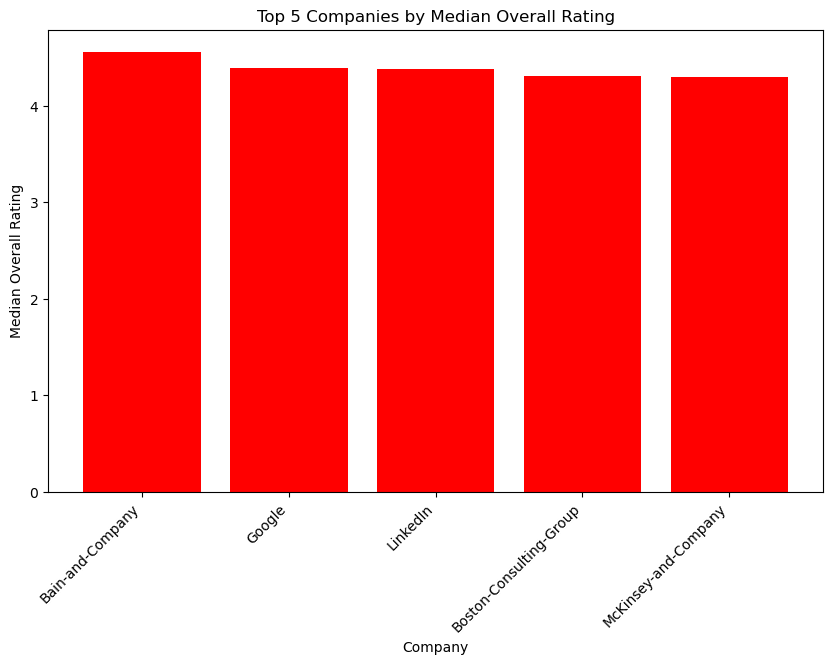

In [22]:
# Convert date_review to datetime
job_df['date_review'] = pd.to_datetime(job_df['date_review'])

# Extract year from date_review
job_df['year'] = job_df['date_review'].dt.year

# Group by company and year, calculate median overall rating
company_year_median = job_df.groupby(['firm', 'year'])['overall_rating'].median().reset_index()

# Count the number of years each company is present
company_year_count = company_year_median['firm'].value_counts()

# Filter companies present in all years
companies_in_all_years = company_year_count[company_year_count == company_year_count.max()].index

# Filter data for companies present in all years
filtered_data = job_df[job_df['firm'].isin(companies_in_all_years)]

# Calculate median overall rating for each company
company_median_ratings = filtered_data.groupby('firm')['overall_rating'].mean().reset_index()

# Sort companies by median overall rating (descending order)
top_5_companies = company_median_ratings.sort_values(by='overall_rating', ascending=False).head(5)

print("Top 5 Companies by Median Overall Rating (Present in All Years):")
print(top_5_companies)

# Plot the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies['firm'], top_5_companies['overall_rating'], color='red')
plt.title('Top 5 Companies by Median Overall Rating')
plt.xlabel('Company')
plt.ylabel('Median Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Bottom Rated (5) Companies Who Are Present in All Time

Bottom 5 Companies by Median Overall Rating (Present in All Years):
            firm  overall_rating
101    WLT-Group        2.585077
100      WHSmith        2.816914
24        Capita        2.879848
82   Serco-Group        3.001188
54    Korn-Ferry        3.005428


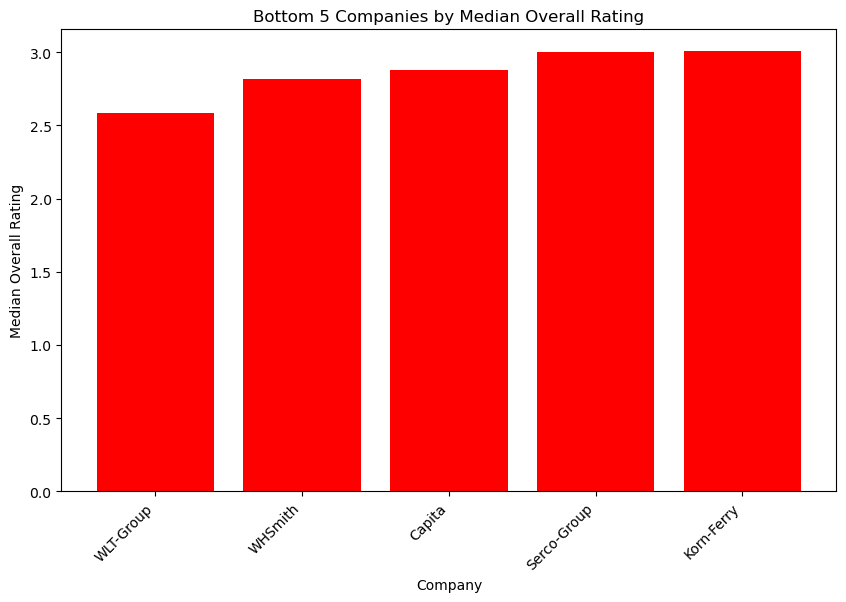

In [26]:
# Sort companies by median overall rating (ascending order)
bottom_5_companies = company_median_ratings.sort_values(by='overall_rating').head(5)

print("Bottom 5 Companies by Median Overall Rating (Present in All Years):")
print(bottom_5_companies)

# Plot the bottom 5 companies
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies['firm'], bottom_5_companies['overall_rating'], color='red')
plt.title('Bottom 5 Companies by Median Overall Rating')
plt.xlabel('Company')
plt.ylabel('Median Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

## Google

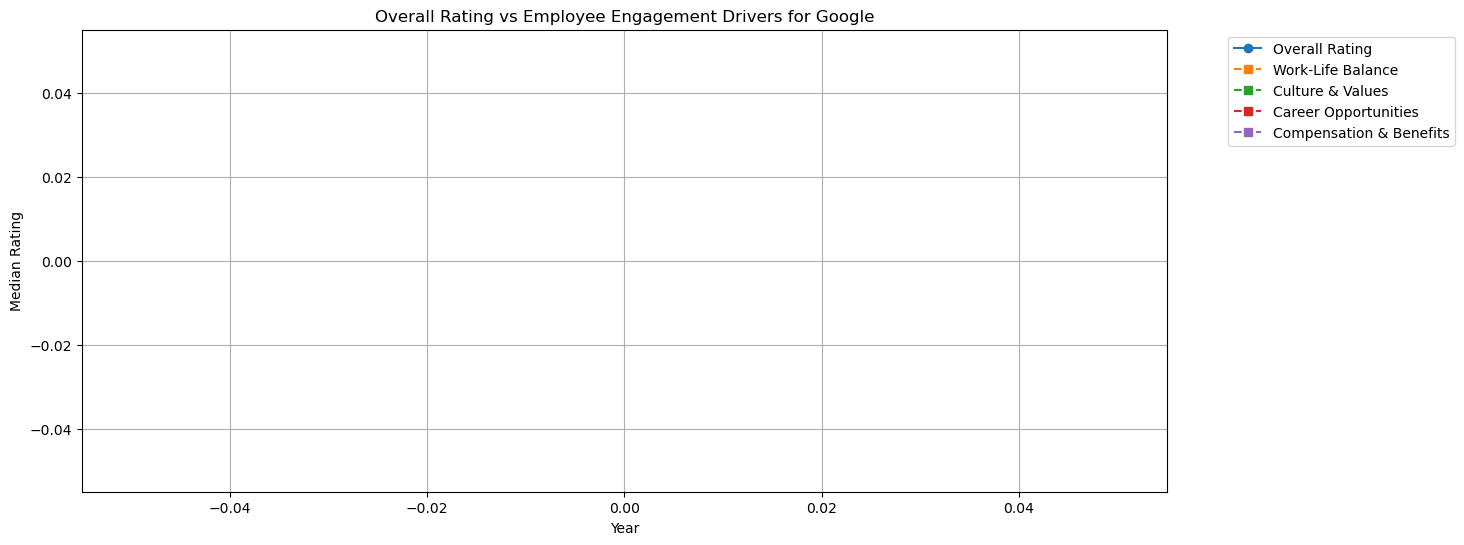

In [160]:

google_data = job_df[job_df['firm'] == 'Google']

google_yearly = google_data.groupby('year')[['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits']].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(google_yearly['year'], google_yearly['overall_rating'], marker='o', label='Overall Rating')
plt.plot(google_yearly['year'], google_yearly['work_life_balance'], marker='s', linestyle='dashed', label='Work-Life Balance')
plt.plot(google_yearly['year'], google_yearly['culture_values'], marker='s', linestyle='dashed', label='Culture & Values')
plt.plot(google_yearly['year'], google_yearly['career_opp'], marker='s', linestyle='dashed', label='Career Opportunities')
plt.plot(google_yearly['year'], google_yearly['comp_benefits'], marker='s', linestyle='dashed', label='Compensation & Benefits')

plt.title('Overall Rating vs Employee Engagement Drivers for Google')
plt.xlabel('Year')
plt.ylabel('Median Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Heat Map

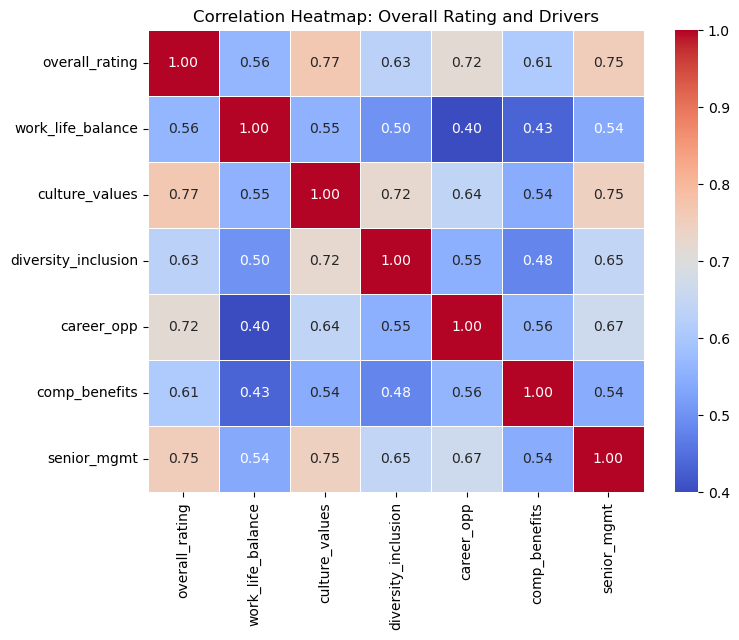

In [158]:
def correlation_heatmap(job_df):
    numeric_columns = ['overall_rating', 'work_life_balance', 'culture_values',
                       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt']
    corr_matrix = job_df[numeric_columns].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap: Overall Rating and Drivers')
    plt.show()

correlation_heatmap(job_df)

In [42]:
job_df["date_review"] = pd.to_datetime(job_df["date_review"])
job_df["year_review"] = job_df["date_review"].dt.year
job_df["quarter_review"] = job_df["date_review"].dt.to_period("Q")
job_df["firm"] = job_df["firm"].str.lower()
job_df["job_title"] = job_df["job_title"].str.lower()

yearly_satisfaction = job_df.groupby(["year_review", "firm"])["overall_rating"].mean()
quarterly_satisfaction = job_df.groupby(["quarter_review","firm"])[["overall_rating","work_life_balance"]].mean()
inclusion_df = job_df.groupby(["quarter_review","firm"])[["overall_rating","work_life_balance"]].mean()

In [48]:
google_data = inclusion_df.loc[(slice(None), 'google'), :].reset_index()

In [162]:

google_data = job_df[job_df['firm'] == 'google']

yearly_google_data = google_data.groupby('year_review')[['overall_rating', 'diversity_inclusion']].mean().reset_index()

google_data = google_data.copy()  
google_data['year_review'] = google_data['year_review'].astype(str)

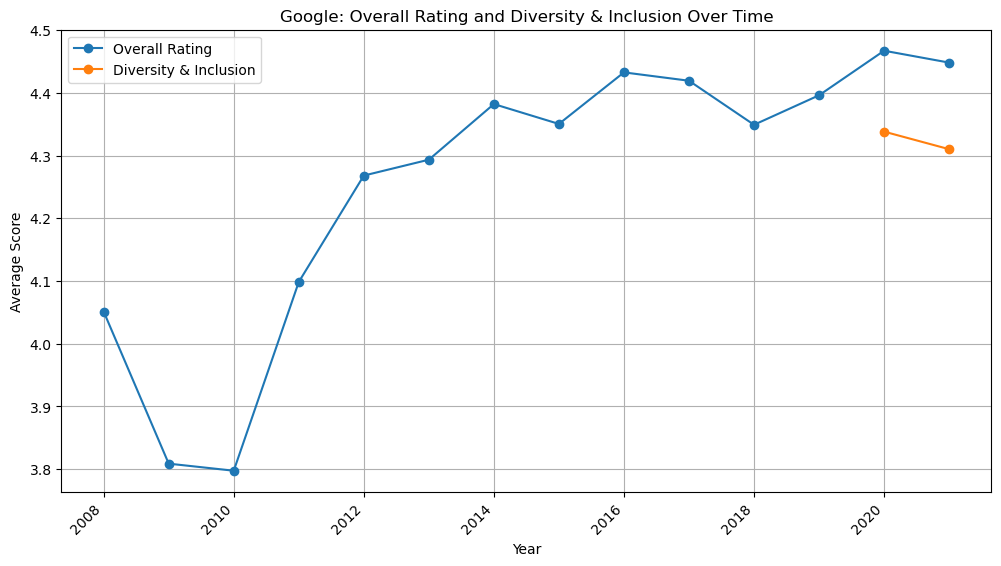

In [164]:
plt.figure(figsize=(12, 6))

plt.plot(yearly_google_data['year_review'], yearly_google_data['overall_rating'], label='Overall Rating', marker='o')

plt.plot(yearly_google_data['year_review'], yearly_google_data['diversity_inclusion'], label='Diversity & Inclusion', marker='o')

plt.title('Google: Overall Rating and Diversity & Inclusion Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

In [166]:
google_data = job_df[job_df['firm'] == 'google']

yearly_google_data = google_data.groupby('year_review')[['overall_rating', 'work_life_balance']].mean().reset_index()


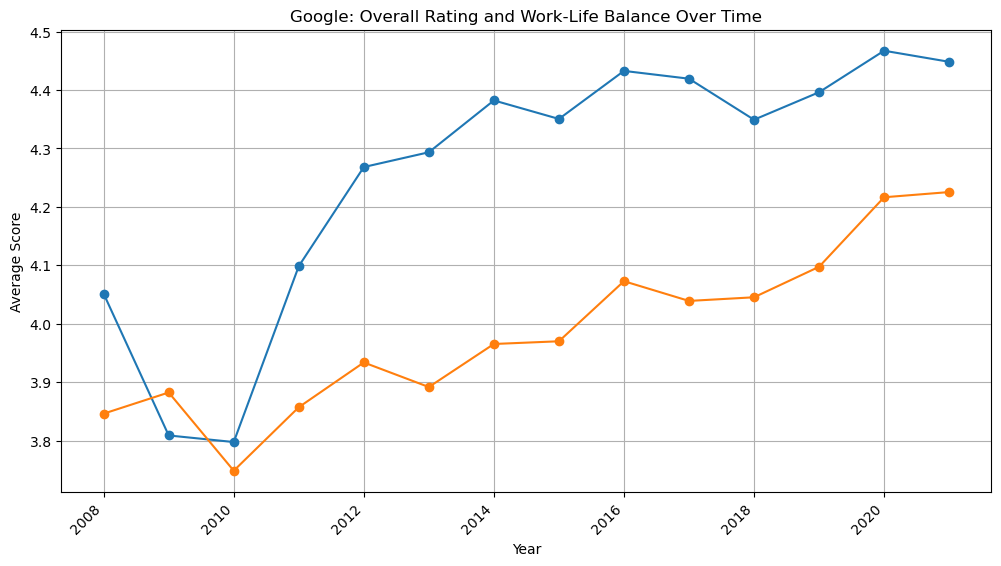

In [170]:

plt.figure(figsize=(12, 6))
plt.plot(yearly_google_data['year_review'], yearly_google_data['overall_rating'], label='Overall Rating', marker='o')
plt.plot(yearly_google_data['year_review'], yearly_google_data['work_life_balance'], label='Work-Life Balance', marker='o')
plt.title('Google: Overall Rating and Work-Life Balance Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right') 
plt.grid(True)
plt.show()

In [184]:

google_data = job_df[job_df['firm'] == 'google']
quarterly_google_data = google_data.groupby('quarter_review')[['overall_rating', 'work_life_balance']].mean().reset_index()
google_data = google_data.copy()  
google_data['year_review'] = google_data['year_review'].astype(str)

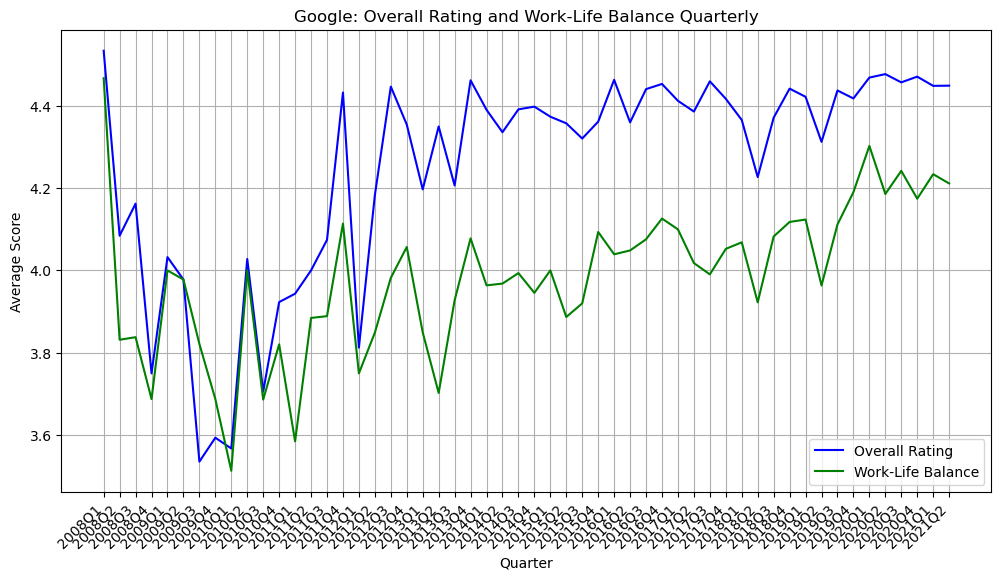

In [186]:
plt.figure(figsize=(12, 6))


quarterly_google_data['quarter_review'] = quarterly_google_data['quarter_review'].astype(str)
plt.plot(quarterly_google_data['quarter_review'], quarterly_google_data['overall_rating'], label='Overall Rating', color='blue')
plt.plot(quarterly_google_data['quarter_review'], quarterly_google_data['work_life_balance'], label='Work-Life Balance', color='green')
plt.title('Google: Overall Rating and Work-Life Balance Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.grid(True)
plt.show()


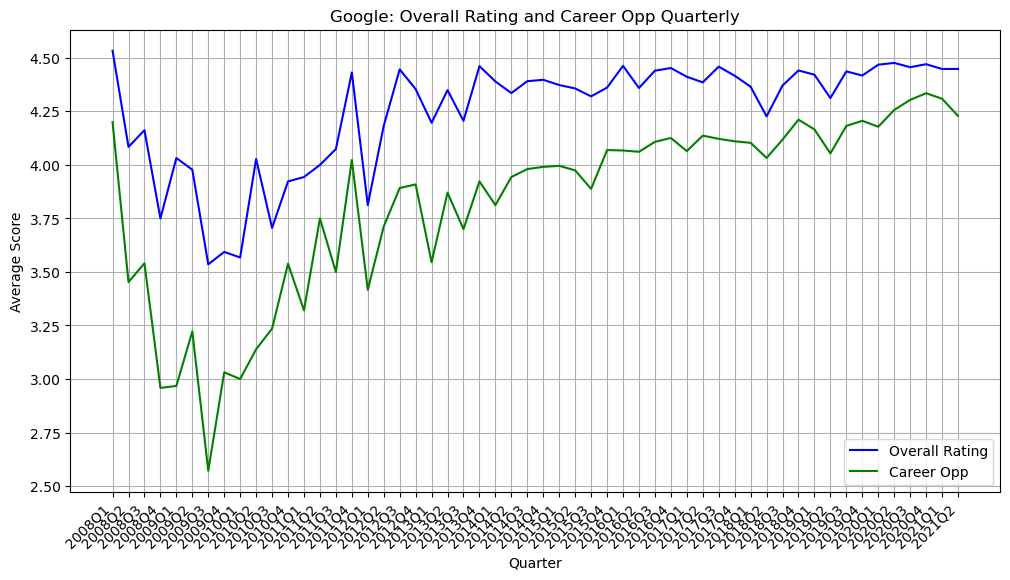

In [180]:

quarterly_google_data = google_data.groupby('quarter_review')[['overall_rating', 'career_opp']].mean().reset_index()
google_data = job_df[job_df['firm'] == 'google']
google_data = google_data.copy()  
google_data['year_review'] = google_data['year_review'].astype(str)
plt.figure(figsize=(12, 6))
quarterly_google_data['quarter_review'] = quarterly_google_data['quarter_review'].astype(str)
plt.plot(quarterly_google_data['quarter_review'], quarterly_google_data['overall_rating'], label='Overall Rating', color='blue')
plt.plot(quarterly_google_data['quarter_review'], quarterly_google_data['career_opp'], label='Career Opp', color='green')
plt.title('Google: Overall Rating and Career Opp Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.grid(True)
plt.show()


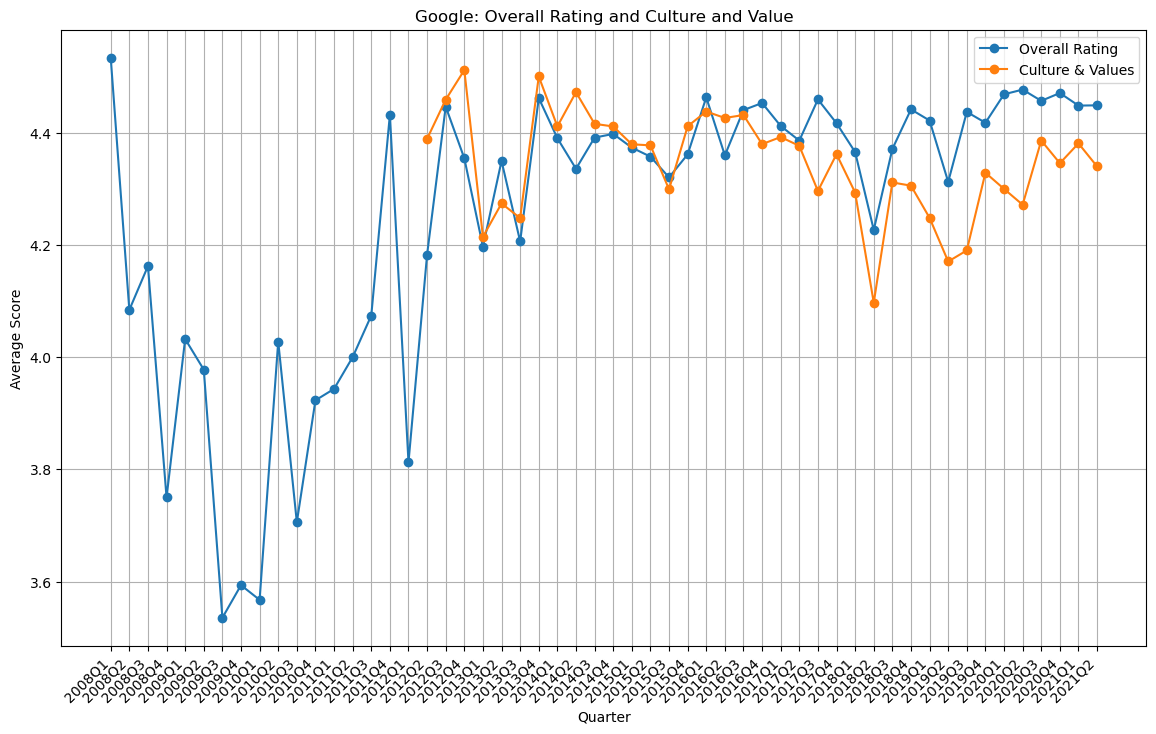

In [100]:
plt.figure(figsize=(14, 8))

plt.plot(quarterly_google_data['quarter_review'], quarterly_google_data['overall_rating'], label='Overall Rating', marker='o')

plt.plot(quarterly_google_data['quarter_review'], quarterly_google_data['culture_values'], label='Culture & Values', marker='o')

plt.title('Google: Overall Rating and Culture and Value')
plt.xlabel('Quarter')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.grid(True)
plt.show()

In [108]:
wlt_group_data = job_df[job_df['firm'].str.contains('wlt-group', case=False, na=False)]

In [116]:
wlt_group_data = wlt_group_data.copy()

wlt_group_data['date_review'] = pd.to_datetime(wlt_group_data['date_review'])
wlt_group_data['quarter_review'] = wlt_group_data['date_review'].dt.to_period("Q") 

quarterly_wlt_data = wlt_group_data.groupby('quarter_review')[['overall_rating', 'comp_benefits']].mean().reset_index()


quarterly_wlt_data['quarter_review'] = quarterly_wlt_data['quarter_review'].astype(str)


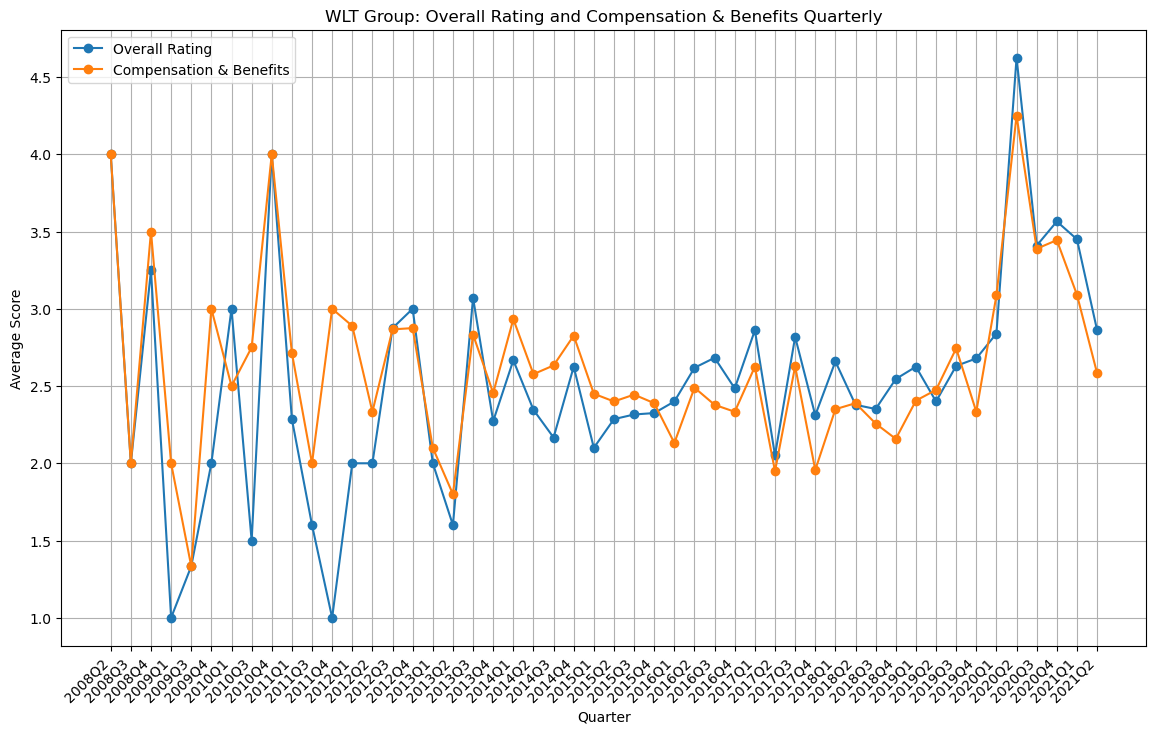

In [118]:

plt.figure(figsize=(14, 8))


plt.plot(quarterly_wlt_data['quarter_review'], quarterly_wlt_data['overall_rating'], label='Overall Rating', marker='o')


plt.plot(quarterly_wlt_data['quarter_review'], quarterly_wlt_data['comp_benefits'], label='Compensation & Benefits', marker='o')


plt.title('WLT Group: Overall Rating and Compensation & Benefits Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

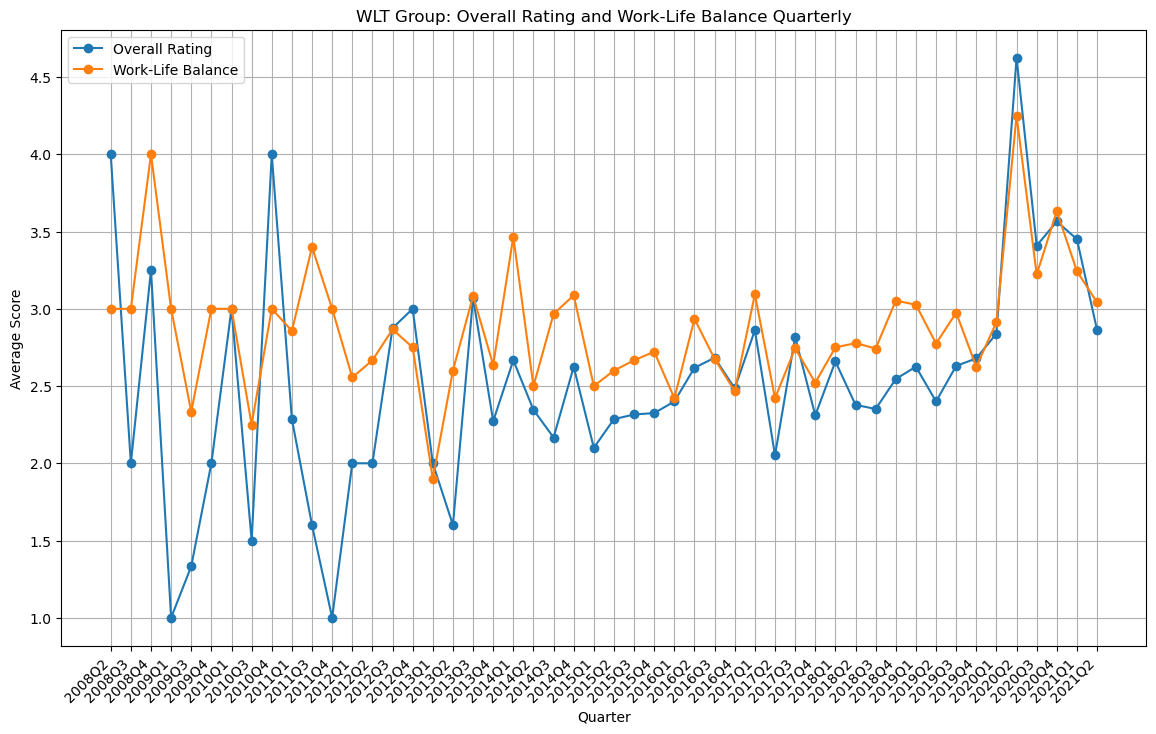

In [122]:

plt.figure(figsize=(14, 8))


plt.plot(quarterly_wlt_data['quarter_review'], quarterly_wlt_data['overall_rating'], label='Overall Rating', marker='o')


plt.plot(quarterly_wlt_data['quarter_review'], quarterly_wlt_data['work_life_balance'], label='Work-Life Balance', marker='o')


plt.title('WLT Group: Overall Rating and Work-Life Balance Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  
plt.legend()
plt.grid(True)
plt.show()

In [152]:
wlt_group_data = wlt_group_data.copy()

wlt_group_data['date_review'] = pd.to_datetime(wlt_group_data['date_review'])
wlt_group_data['quarter_review'] = wlt_group_data['date_review'].dt.to_period("Q") 

quarterly_wlt_data = wlt_group_data.groupby('quarter_review')[['overall_rating', 'work_life_balance','culture_values','diversity_inclusion',"career_opp","comp_benefits","senior_mgmt"]].mean().reset_index()

quarterly_wlt_data['quarter_review'] = quarterly_wlt_data['quarter_review'].astype(str)


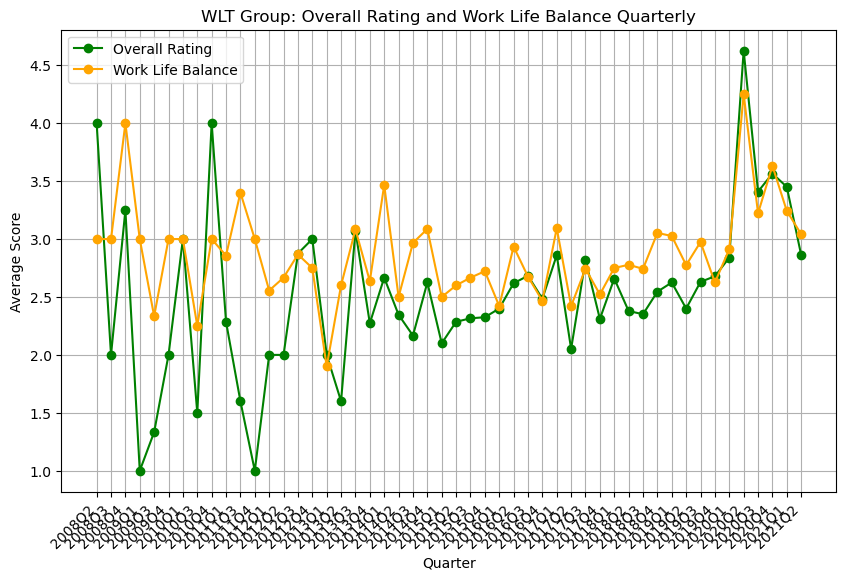

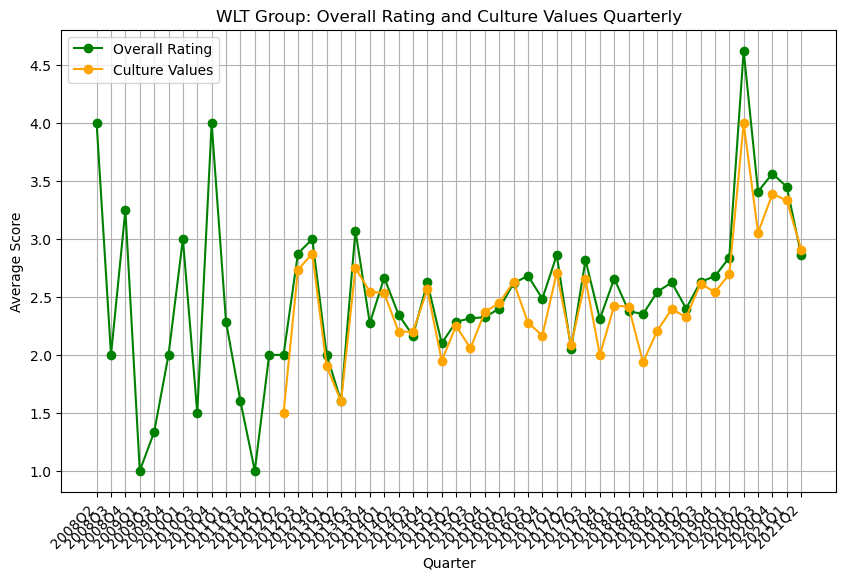

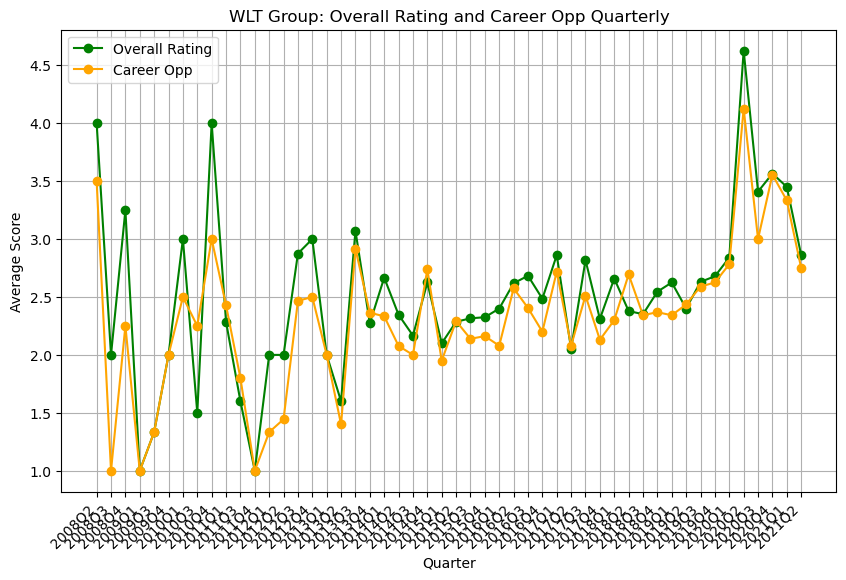

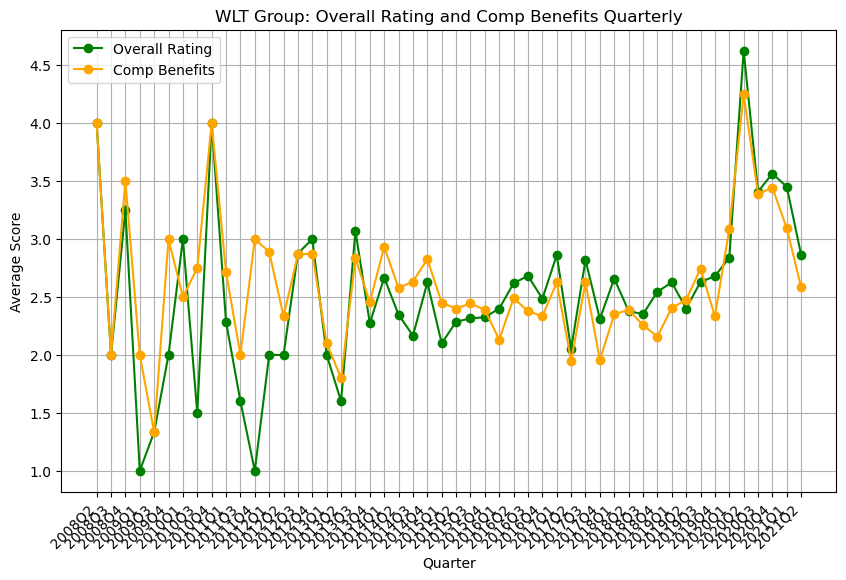

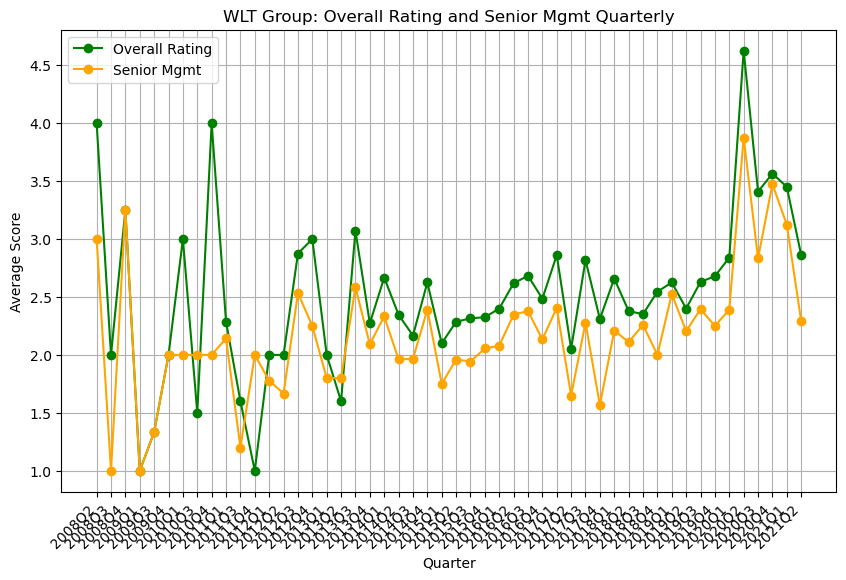

In [190]:
for driver in engagement_drivers:
    plt.figure(figsize=(10, 6))

    plt.plot(quarterly_wlt_data['quarter_review'], quarterly_wlt_data['overall_rating'], label='Overall Rating', marker='o', color='green')

    plt.plot(quarterly_wlt_data['quarter_review'], quarterly_wlt_data[driver], label=driver.replace('_', ' ').title(), marker='o', color='orange')

    plt.title(f'WLT Group: Overall Rating and {driver.replace("_", " ").title()} Quarterly')
    plt.xlabel('Quarter')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45, ha='right')  
    plt.legend()
    plt.grid(True)
    plt.show()

In [188]:

recommend_counts = wlt_data['recommend'].value_counts()

print("Recommendation Counts for WLT Group:")
print(recommend_counts)

Recommendation Counts for WLT Group:
recommend
x    608
v    323
o    168
Name: count, dtype: int64


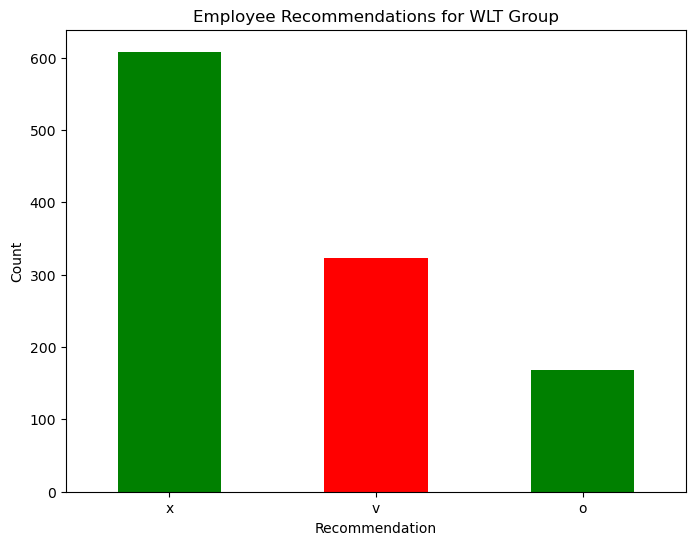

In [134]:

plt.figure(figsize=(8, 6))
recommend_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Employee Recommendations for WLT Group')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()